<a href="https://colab.research.google.com/github/gandhirajj/Brain_Tumor/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


175/175 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.8127 - loss: 0.5276 - val_accuracy: 0.8118 - val_loss: 0.4879
Epoch 2/20
  1/175 ━━━━━━━━━━━━━━━━━━━━ 3:57 1s/step - accuracy: 0.9062 - loss: 0.3361

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.3361 - val_accuracy: 0.8929 - val_loss: 0.3613
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.8092 - loss: 0.4871 - val_accuracy: 0.8118 - val_loss: 0.4937
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.4181 - val_accuracy: 0.8929 - val_loss: 0.3568
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8115 - loss: 0.4685 - val_accuracy: 0.8125 - val_loss: 0.5039
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.3683 - val_accuracy: 0.8571 - val_loss: 0.4355
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.8064 - loss: 0.4740 - val_accuracy: 0.8125 - val_loss: 0.5053
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.3303 - val_accuracy: 0.8571 - val_loss: 0.4201
Epoch 9/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.8140 - loss: 0.4589 - val_accuracy: 0.8132 - 

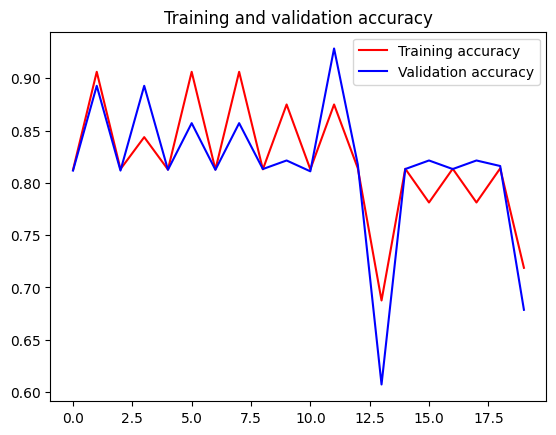

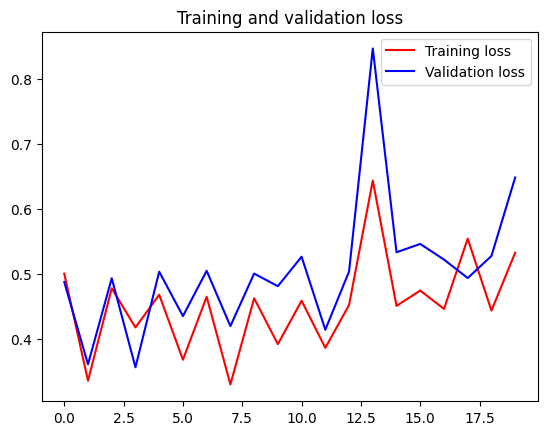

44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 543ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[   0  262]
 [   0 1142]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.81      1.00      0.90      1142

    accuracy                           0.81      1404
   macro avg       0.41      0.50      0.45      1404
weighted avg       0.66      0.81      0.73      1404



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
import zipfile
import os

# Path to the zip file and the extraction directory
zip_file_path = '/archive.zip'
extracted_dir = '/extracted_data'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator and point it to the extracted directory
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_gen.flow_from_directory(
    extracted_dir,  # Use the path to the extracted directory
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    extracted_dir,  # Use the same path
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Step 2: Model Creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Step 5: Evaluate the Model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Step 6: Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Step 7: Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.round(Y_pred).astype(int)

print(confusion_matrix(validation_generator.classes, y_pred))
print(classification_report(validation_generator.classes, y_pred))

# Step 8: Save the Model
model.save('brain_tumor_detection_model.h5')